In [1]:
import os
import pandas as pd
import gzip
import json
import numpy as np
import time

In [2]:
wos_path = "../wos_json"
wos_list = os.listdir(wos_path)
wos_list

['WR_1900_20230129100257_CORE_0001.json.gz',
 'WR_1900_20230129100257_CORE_0002.json.gz',
 'WR_1900_20230129100257_CORE_0003.json.gz',
 'WR_1900_20230129100257_CORE_0004.json.gz',
 'WR_1900_20230129100257_CORE_0005.json.gz',
 'WR_1900_20230129100257_CORE_0006.json.gz',
 'WR_1900_20230129100257_CORE_0007.json.gz',
 'WR_1900_20230129100257_CORE_0008.json.gz',
 'WR_1900_20230129100257_CORE_0009.json.gz',
 'WR_1900_20230129100257_CORE_0010.json.gz',
 'WR_1900_20230129100257_CORE_0011.json.gz',
 'WR_1900_20230129100257_CORE_0012.json.gz',
 'WR_1900_20230129100257_CORE_0013.json.gz',
 'WR_1900_20230129100257_CORE_0014.json.gz',
 'WR_1945_20230129060556_CORE_0001.json.gz',
 'WR_1946_20230129050021_CORE_0001.json.gz',
 'WR_1947_20230129035354_CORE_0001.json.gz',
 'WR_1948_20230129024729_CORE_0001.json.gz',
 'WR_1949_20230129014119_CORE_0001.json.gz',
 'WR_1950_20230129003403_CORE_0001.json.gz',
 'WR_1951_20230128232450_CORE_0001.json.gz',
 'WR_1951_20230128232450_CORE_0002.json.gz',
 'WR_1952_

In [ ]:
folder_path = 'result'
file_list = os.listdir(folder_path)
file_list

In [4]:
ref_path = "result"
ref_list = []
for x in os.listdir(ref_path):
    if x.endswith('reference.csv'):
        ref_list.append(x)
ref_list

['2018_uwm_reference.csv',
 '2019_uwm_reference.csv',
 '2020_uwm_reference.csv',
 '2021_uwm_reference.csv',
 '2022_uwm_reference.csv']

## Combine reference data

make combination of 20xx_reference.csv to get the unique reference list and its metadata

In [43]:
count_dict = {}
for x in range(2018,2023):
    data_x = pd.read_csv('result/'+str(x)+'_uwm_reference.csv', dtype = str)
    id_dict = data_x['id'].value_counts().to_dict()
    for i in range(len(data_x)):
        id_i = data_x.iloc[i,1]
        if pd.isna(id_i)==True:
            continue
        if id_i not in count_dict:
            count_dict[id_i]=[0,0,0,0,0]
            for j in range(2,11):
                count_dict[id_i].append(data_x.iloc[i,j])
        count_dict[id_i][x-2018]=id_dict[id_i]

In [54]:
data_0 = pd.DataFrame.from_dict(count_dict, orient='index',columns=['2018','2019','2020','2021','2022', 'year', 'author', 'title', 'work', 'doi', 'page',
       'volume', 'occurrence_order', 'physical_sections']).reset_index().rename(columns={"index":"id"})

In [57]:
data_0

,id,2018,2019,2020,2021,2022,year,author,title,work,doi,page,volume,occurrence_order,physical_sections
0,WOS:000218666500001,1,0,0,0,0,2013,"Poullikkas, A",A comparative assessment of net metering and f...,SUSTAINABLE ENERGY TECHNOLOGIES AND ASSESSMENTS,10.1016/j.seta.2013.04.001,1,3,7,NaN
1,000444741500122.11,1,0,0,0,0,2017,"Tran, V. T.",A robust power management strategy entrenched ...,P IEEE IND APPL SOC,NaN,1,NaN,11,NaN
2,WOS:000331985300047,1,0,0,0,0,2014,"Yang, Y",Sizing Strategy of Distributed Battery Storage...,IEEE TRANSACTIONS ON SMART GRID,10.1109/TSG.2013.2282504,982,5,12,NaN
3,WOS:000354945400060,1,0,0,0,0,2015,"Kim, ST",Energy Management Based on the Photovoltaic HP...,IEEE TRANSACTIONS ON INDUSTRIAL ELECTRONICS,10.1109/TIE.2014.2370941,4608,62,5,NaN
4,WOS:000426811700056,1,0,0,0,0,2017,"Prapanukool, C",An Appropriate Battery Capacity and Operation ...,2017 14TH INTERNATIONAL CONFERENCE ON ELECTRIC...,NaN,222,NaN,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653697,000742181300001.10,0,0,0,0,1,2015,The American College of Obstetricians and Gyne...,NaN,Obesity in pregnancy. Practice Bulletin No. 15...,NaN,e112,126,10,NaN
1653698,WOS:000302613800014,0,0,0,0,1,2012,"Bonner, JC",Respiratory arrest in an obstetric patient usi...,ANAESTHESIA,10.1111/j.1365-2044.2011.06997.x,538,67,42,NaN
1653699,WOS:000314640800009,0,0,0,0,1,2013,"Marr, R",Cardiac arrest in an obstetric patient using r...,ANAESTHESIA,10.1111/anae.12099,283,68,43,NaN
1653700,000742181300001.32,0,0,0,0,1,2005,The American College of Obstetricians and Gyne...,Pregestational diabetes mellitus. ACOG Practic...,Obstet Gynecol,NaN,675,105,32,NaN


In [56]:
#data_0.to_csv('all_result/reference_information.csv',index=False)

### get issn of reference

In [59]:
data_0_dict = data_0.set_index('id').T.to_dict('list')

In [62]:
len(data_0_dict.keys())

1653702

In [ ]:
for file in wos_list:
    i = 0
    year = file[3:7]
    if int(year)<i:
        continue
    
    start = time.time()
    with gzip.open(wos_path+'/'+file, mode="rt") as f:
        data = [json.loads(line) for line in f]
    
    for paper in data:
        pid = paper['id']
        if pid in data_0_dict:
            if len(data_0_dict[pid])>14:
                continue
            pub_type = ''
            heading = ''
            heading_len = 0
            issn_p = ''
            eissn_p = ''
            if paper['pub_type']!=None:
                pub_type = paper['pub_type']
            if paper['headings']!=None:
                heading = paper['headings']
                heading_len = len(heading)
            if paper['identifiers']!=None:
                for identifier in paper['identifiers']:
                    if identifier['type']=='issn':
                        issn_p = identifier['value']
                    if identifier['type']=='eissn':
                        eissn_p = identifier['value']
            data_0_dict[pid].append(issn_p)
            data_0_dict[pid].append(eissn_p)
            data_0_dict[pid].append(pub_type)
            data_0_dict[pid].append(heading)
            data_0_dict[pid].append(heading_len)

    end = time.time()

    print(file, end-start)

WR_1900_20230129100257_CORE_0001.json.gz 2.657249689102173
WR_1900_20230129100257_CORE_0002.json.gz 2.8682026863098145
WR_1900_20230129100257_CORE_0003.json.gz 2.870694875717163
WR_1900_20230129100257_CORE_0004.json.gz 2.8169045448303223
WR_1900_20230129100257_CORE_0005.json.gz 2.8630926609039307
WR_1900_20230129100257_CORE_0006.json.gz 5.138888120651245
WR_1900_20230129100257_CORE_0007.json.gz 2.955847978591919
WR_1900_20230129100257_CORE_0008.json.gz 4.884104251861572
WR_1900_20230129100257_CORE_0009.json.gz 5.1081929206848145
WR_1900_20230129100257_CORE_0010.json.gz 2.769261598587036
WR_1900_20230129100257_CORE_0011.json.gz 4.790064811706543
WR_1900_20230129100257_CORE_0012.json.gz 5.0708301067352295
WR_1900_20230129100257_CORE_0013.json.gz 2.8121321201324463
WR_1900_20230129100257_CORE_0014.json.gz 3.167255401611328
WR_1945_20230129060556_CORE_0001.json.gz 1.5383963584899902
WR_1946_20230129050021_CORE_0001.json.gz 1.8199388980865479
WR_1947_20230129035354_CORE_0001.json.gz 4.03680

In [71]:
data_new = pd.DataFrame.from_dict(data_0_dict, orient='index', columns = ['2018','2019','2020','2021','2022', 'year', 'author', 'title', 'work', 'doi', 'page',
       'volume', 'occurrence_order', 'physical_sections','issn','eissn','publication_type','heading','heading_len']).reset_index().rename(columns={"index":"id"})

In [ ]:
data_new.to_csv('all_result/reference_full_information.csv',index=False)
data_new.head(1000).to_csv('all_result/reference_full_information_1000.csv',index=False)
data_new[~data_new['id'].str.match('WOS')].to_csv('all_result/reference_nowos_information.csv',index=False)

In [75]:
data_new

,id,2018,2019,2020,2021,2022,year,author,title,work,doi,page,volume,occurrence_order,physical_sections,issn,eissn,publication_type,heading,heading_len
0,WOS:000218666500001,1,0,0,0,0,2013,"Poullikkas, A",A comparative assessment of net metering and f...,SUSTAINABLE ENERGY TECHNOLOGIES AND ASSESSMENTS,10.1016/j.seta.2013.04.001,1,3,7,NaN,2213-1388,2213-1396,Journal,[Science & Technology],1.0
1,000444741500122.11,1,0,0,0,0,2017,"Tran, V. T.",A robust power management strategy entrenched ...,P IEEE IND APPL SOC,NaN,1,NaN,11,NaN,None,None,None,None,NaN
2,WOS:000331985300047,1,0,0,0,0,2014,"Yang, Y",Sizing Strategy of Distributed Battery Storage...,IEEE TRANSACTIONS ON SMART GRID,10.1109/TSG.2013.2282504,982,5,12,NaN,1949-3053,1949-3061,Journal,[Science & Technology],1.0
3,WOS:000354945400060,1,0,0,0,0,2015,"Kim, ST",Energy Management Based on the Photovoltaic HP...,IEEE TRANSACTIONS ON INDUSTRIAL ELECTRONICS,10.1109/TIE.2014.2370941,4608,62,5,NaN,0278-0046,1557-9948,Journal,[Science & Technology],1.0
4,WOS:000426811700056,1,0,0,0,0,2017,"Prapanukool, C",An Appropriate Battery Capacity and Operation ...,2017 14TH INTERNATIONAL CONFERENCE ON ELECTRIC...,NaN,222,NaN,8,NaN,,,Book,[Science & Technology],1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653697,000742181300001.10,0,0,0,0,1,2015,The American College of Obstetricians and Gyne...,NaN,Obesity in pregnancy. Practice Bulletin No. 15...,NaN,e112,126,10,NaN,None,None,None,None,NaN
1653698,WOS:000302613800014,0,0,0,0,1,2012,"Bonner, JC",Respiratory arrest in an obstetric patient usi...,ANAESTHESIA,10.1111/j.1365-2044.2011.06997.x,538,67,42,NaN,0003-2409,,Journal,[Science & Technology],1.0
1653699,WOS:000314640800009,0,0,0,0,1,2013,"Marr, R",Cardiac arrest in an obstetric patient using r...,ANAESTHESIA,10.1111/anae.12099,283,68,43,NaN,0003-2409,1365-2044,Journal,[Science & Technology],1.0
1653700,000742181300001.32,0,0,0,0,1,2005,The American College of Obstetricians and Gyne...,Pregestational diabetes mellitus. ACOG Practic...,Obstet Gynecol,NaN,675,105,32,NaN,None,None,None,None,NaN


In [90]:
data_new[(~data_new['issn'].isnull())&(data_new['issn']!="")]['publication_type'].value_counts()

publication_type
Journal           1154519
Book in series      22967
Name: count, dtype: int64

In [82]:
data_new[data_new['id'].str.match('WOS')]['publication_type'].value_counts().sum()

1219821

### get isbn of reference

In [ ]:
data_new[data_new['year']=='1964']

,id,2018,2019,2020,2021,2022,year,author,title,work,doi,page,volume,occurrence_order,physical_sections,issn,eissn,publication_type,heading,heading_len
5477,000683379205003.18,1,0,0,0,0,1964,"Polyak, B.",Some methods of speeding up the convergence of...,USSR Computational Mathematics and Mathematica...,NaN,1,4,18,NaN,NaN,NaN,NaN,NaN,NaN
5745,000456798100002.28,1,0,0,0,0,1964,"Thordeman, Bengt",Attitudes to the Heritage,Medieval Wooden Sculpture in Sweden,NaN,NaN,1,28,NaN,NaN,NaN,NaN,NaN,NaN
6337,WOS:A19645223B00017,1,0,0,0,0,1964,"MIKUMO, T",DETERMINATION OF LOCAL PHASE VELOCITY BY INTER...,JOURNAL OF GEOPHYSICAL RESEARCH,NaN,721,69,22,NaN,0148-0227,NaN,Journal,['Science & Technology'],1.0
6810,WOS:A1964CHA9000010,1,0,1,0,0,1964,"GUMPERZ, JJ",LINGUISTIC AND SOCIAL-INTERACTION IN 2 COMMUNI...,AMERICAN ANTHROPOLOGIST,NaN,137,66,20,NaN,0002-7294,NaN,Journal,['Science & Technology'],1.0
8491,CABI:19651604322,1,0,0,0,0,1964,"WEBSTER, O. J.",Sorghum vulgare Pers.\n,Crop science,NaN,656,4,75,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648619,000866373900001.31,0,0,0,0,1,1964,NaN,NaN,Griffin v. County School Board of Prince County,NaN,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN
1648843,WOS:A19647820B00463,0,0,0,0,1,1964,"PALMER, RA",PROLONGED PERITONEAL DIALYSIS FOR CHRONIC RENA...,LANCET,NaN,700,1,73,NaN,0140-6736,NaN,Journal,['Science & Technology'],1.0
1648860,000804740700025.17,0,0,0,0,1,1964,"Boen, ST",Chronic hemo-dialysis and peritoneal dialysis,Proc Eur Dial Transplant Assoc,NaN,221,1,17,NaN,NaN,NaN,NaN,NaN,NaN
1650019,WOS:A19643058C00285,0,0,0,0,1,1964,"YABE, Y",ONCOGENIC EFFECT OF HUMAN ADENOVIRUS TYPE 12 I...,SCIENCE,NaN,46,143,39,NaN,0036-8075,NaN,Journal,['Science & Technology'],1.0


In [ ]:
data_new_dict = data_new.set_index('id').T.to_dict('list')

In [ ]:
for file in wos_list:
    i = 0
    year = file[3:7]
    if int(year)<i:
        continue
    
    start = time.time()
    with gzip.open(wos_path+'/'+file, mode="rt") as f:
        data = [json.loads(line) for line in f]
    
    for paper in data:
        pid = paper['id']
        if pid in data_new_dict:
            if len(data_new_dict[pid])>20:
                continue
            doc_types = ''

            isbn_p = ''
            eisbn_p = ''
            if paper['document_types']!=None:
                doc_type = paper['document_types']
            if paper['identifiers']!=None:
                for identifier in paper['identifiers']:
                    if identifier['type']=='isbn':
                        isbn_p = identifier['value']
                    if identifier['type']=='eisbn':
                        eisbn_p = identifier['value']
            data_new_dict[pid].append(isbn_p)
            data_new_dict[pid].append(eisbn_p)
            data_new_dict[pid].append(doc_type)
    end = time.time()

    print(file, end-start)

WR_1900_20230129100257_CORE_0001.json.gz 4.649744987487793
WR_1900_20230129100257_CORE_0002.json.gz 3.0453155040740967
WR_1900_20230129100257_CORE_0003.json.gz 3.277036190032959
WR_1900_20230129100257_CORE_0004.json.gz 3.1447174549102783
WR_1900_20230129100257_CORE_0005.json.gz 3.093557834625244
WR_1900_20230129100257_CORE_0006.json.gz 5.32253360748291
WR_1900_20230129100257_CORE_0007.json.gz 5.287940740585327
WR_1900_20230129100257_CORE_0008.json.gz 3.0904581546783447
WR_1900_20230129100257_CORE_0009.json.gz 4.905842542648315
WR_1900_20230129100257_CORE_0010.json.gz 5.0419793128967285
WR_1900_20230129100257_CORE_0011.json.gz 5.139527320861816
WR_1900_20230129100257_CORE_0012.json.gz 5.311727285385132
WR_1900_20230129100257_CORE_0013.json.gz 5.229445219039917
WR_1900_20230129100257_CORE_0014.json.gz 1.2827305793762207
WR_1945_20230129060556_CORE_0001.json.gz 1.6418349742889404
WR_1946_20230129050021_CORE_0001.json.gz 3.615034818649292
WR_1947_20230129035354_CORE_0001.json.gz 2.34823656

In [ ]:
data_new_2 = pd.DataFrame.from_dict(data_new_dict, orient='index', columns = ['2018','2019','2020','2021','2022', 'year', 'author', 'title', 'work', 'doi', 'page',
       'volume', 'occurrence_order', 'physical_sections','issn','eissn','publication_type','heading','heading_len','isbn','eisbn','doc_type']).reset_index().rename(columns={"index":"id"})

In [ ]:
data_new_2

,id,2018,2019,2020,2021,2022,year,author,title,work,...,occurrence_order,physical_sections,issn,eissn,publication_type,heading,heading_len,isbn,eisbn,doc_type
0,WOS:000218666500001,1,0,0,0,0,2013,"Poullikkas, A",A comparative assessment of net metering and f...,SUSTAINABLE ENERGY TECHNOLOGIES AND ASSESSMENTS,...,7,NaN,2213-1388,2213-1396,Journal,['Science & Technology'],1.0,,,[Article]
1,000444741500122.11,1,0,0,0,0,2017,"Tran, V. T.",A robust power management strategy entrenched ...,P IEEE IND APPL SOC,...,11,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
2,WOS:000331985300047,1,0,0,0,0,2014,"Yang, Y",Sizing Strategy of Distributed Battery Storage...,IEEE TRANSACTIONS ON SMART GRID,...,12,NaN,1949-3053,1949-3061,Journal,['Science & Technology'],1.0,,,[Article]
3,WOS:000354945400060,1,0,0,0,0,2015,"Kim, ST",Energy Management Based on the Photovoltaic HP...,IEEE TRANSACTIONS ON INDUSTRIAL ELECTRONICS,...,5,NaN,0278-0046,1557-9948,Journal,['Science & Technology'],1.0,,,[Article]
4,WOS:000426811700056,1,0,0,0,0,2017,"Prapanukool, C",An Appropriate Battery Capacity and Operation ...,2017 14TH INTERNATIONAL CONFERENCE ON ELECTRIC...,...,8,NaN,NaN,NaN,Book,['Science & Technology'],1.0,,978-1-5386-0449-6,[Meeting]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653697,000742181300001.10,0,0,0,0,1,2015,The American College of Obstetricians and Gyne...,NaN,Obesity in pregnancy. Practice Bulletin No. 15...,...,10,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None
1653698,WOS:000302613800014,0,0,0,0,1,2012,"Bonner, JC",Respiratory arrest in an obstetric patient usi...,ANAESTHESIA,...,42,NaN,0003-2409,NaN,Journal,['Science & Technology'],1.0,,,[Article]
1653699,WOS:000314640800009,0,0,0,0,1,2013,"Marr, R",Cardiac arrest in an obstetric patient using r...,ANAESTHESIA,...,43,NaN,0003-2409,1365-2044,Journal,['Science & Technology'],1.0,,,[Article]
1653700,000742181300001.32,0,0,0,0,1,2005,The American College of Obstetricians and Gyne...,Pregestational diabetes mellitus. ACOG Practic...,Obstet Gynecol,...,32,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None


In [ ]:
data_new_2.to_csv('all_result/reference_full_information_v2.csv',index=False)

## Year count

Distribution of publictation year of the References

In [32]:
import matplotlib.pyplot as plt

import os
import pandas as pd
import gzip
import json
import numpy as np
import time

In [44]:
data_new_2 = pd.read_csv('all_result/reference_full_information_v2.csv', dtype = str)

In [45]:
data_new_2['total'] = data_new_2['2018']+data_new_2['2019']+data_new_2['2020']+data_new_2['2021']+data_new_2['2022']

In [46]:
year_result = {}
year_dict = data_new_2['year'].value_counts().to_dict()
for m in year_dict:
    if len(m)!=4:
        continue
    if m not in year_result:
        year_result[m]=year_dict[m]

In [47]:
data_year = pd.DataFrame.from_dict(year_result, orient='index',columns=['year_count']).reset_index().rename(columns={"index":"year"})
data_year['year'] = data_year.year.astype('int')

In [49]:
data_year[data_year['year']>2022]

,year,year_count
165,2023,37
462,2479,1
485,2103,1
499,2108,1
504,2024,1
505,2915,1
517,2104,1


In [36]:
data_year = pd.DataFrame.from_dict(year_result, orient='index',columns=['year_count']).reset_index().rename(columns={"index":"year"})
data_year['year'] = data_year.year.astype('int')
data_year = data_year[(data_year['year']>1800)&(data_year['year']<2023)]
data_year.to_csv('7_year_count_new.csv',index=False)

In [37]:
data_year

,year,year_count
0,2017,109884
1,2016,105023
2,2018,101516
3,2015,97210
4,2014,88296
...,...,...
262,1813,8
289,1807,6
297,1814,5
298,1804,5


In [38]:
data_year_1 = data_year.sort_values('year').reset_index(drop=True)

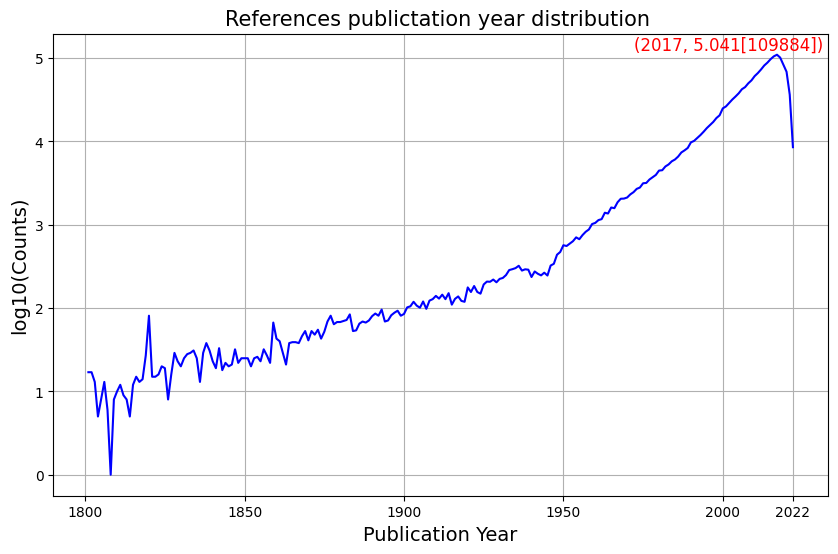

In [43]:
plt.figure(figsize=(10, 6))
#plt.plot(data_0['year'], data_0['total'], marker='o', linestyle='-', color='b')
plt.plot(data_year_1['year'], np.log10(data_year_1['year_count']), linestyle='-', color='b')

plt.title('References publictation year distribution ', fontsize=15)
plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('log10(Counts)', fontsize=14)

plt.xticks([1800,1850,1900,1950,2000,2022])

plt.yticks([0,1,2,3,4,5],[0,1,2,3,4,5])

plt.text(data_year_1['year'][216] - 45, np.log10(data_year_1['year_count'][216])+0.05, f'(2017, 5.041[109884])', color='r', fontsize=12)

plt.grid(True)

plt.savefig('7_year_count_new.png')